<p style='text-align:center'>
    <a href='https://skills.network' target='_blank'>
    <img src='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png' width='200' alt='Skills Network Logo'  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:

# Identify duplicate rows
duplicates = df[df.duplicated()]

# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

# Display the first few duplicate rows
print('First few duplicate rows:')
print(duplicates.head())


Number of duplicate rows: 20
First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
subset =['MainBranch', 'Employment', 'RemoteWork']

# Identify rows that are duplicates based on the subset
df_duplicates = df[df.duplicated(subset, keep=False)]

df_duplicates.head(20)
display (df_duplicates.shape)

# Group the duplicate rows by the subset
grouped = df_duplicates.groupby(subset)

# Dictionary to count how often each column has identical values across groups
identical_counts = {}

# Analyze each group
for _, group in grouped:
    for col in df.columns:
        if col not in subset:
            if group[col].nunique() == 1:
                identical_counts[col] = identical_counts.get(col, 0) + 1

# Sort columns by frequency of identical values
sorted_identical = sorted(identical_counts.items(), key=lambda x: x[1], reverse=True)

# Display results
print('Columns frequently containing identical values within duplicate groups:')
for col, count in sorted_identical:
    print(f'{col}: {count} groups')


(65290, 114)

Columns frequently containing identical values within duplicate groups:
Check: 319 groups
ICorPM: 97 groups
AIThreat: 88 groups
SOAccount: 85 groups
AINextLess integrated: 76 groups
AISelect: 75 groups
SurveyLength: 75 groups
AINextMuch more integrated: 74 groups
AINextNo change: 67 groups
SOPartFreq: 67 groups
AIToolNot interested in Using: 67 groups
AIComplex: 64 groups
PlatformWantToWorkWith: 61 groups
MiscTechAdmired: 61 groups
EmbeddedWantToWorkWith: 60 groups
PlatformAdmired: 59 groups
AISent: 59 groups
EmbeddedAdmired: 58 groups
ProfessionalCloud: 58 groups
ProfessionalQuestion: 58 groups
Frequency_1: 58 groups
SurveyEase: 58 groups
EmbeddedHaveWorkedWith: 58 groups
TechDoc: 58 groups
Knowledge_3: 57 groups
AINextMore integrated: 56 groups
TBranch: 56 groups
JobSatPoints_11: 56 groups
Knowledge_1: 55 groups
JobSatPoints_4: 55 groups
TimeAnswering: 54 groups
Industry: 54 groups
Knowledge_6: 54 groups
AIAcc: 54 groups
Knowledge_5: 54 groups
AINextMuch less integrated: 53 groups
Fr

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


/tmp/ipykernel_1195/3421250910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates['Country'] = df_duplicates['Country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
/tmp/ipykernel_1195/3421250910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates['Country'] = df_duplicates['Country'].str.replace('United States of America', 'USA')


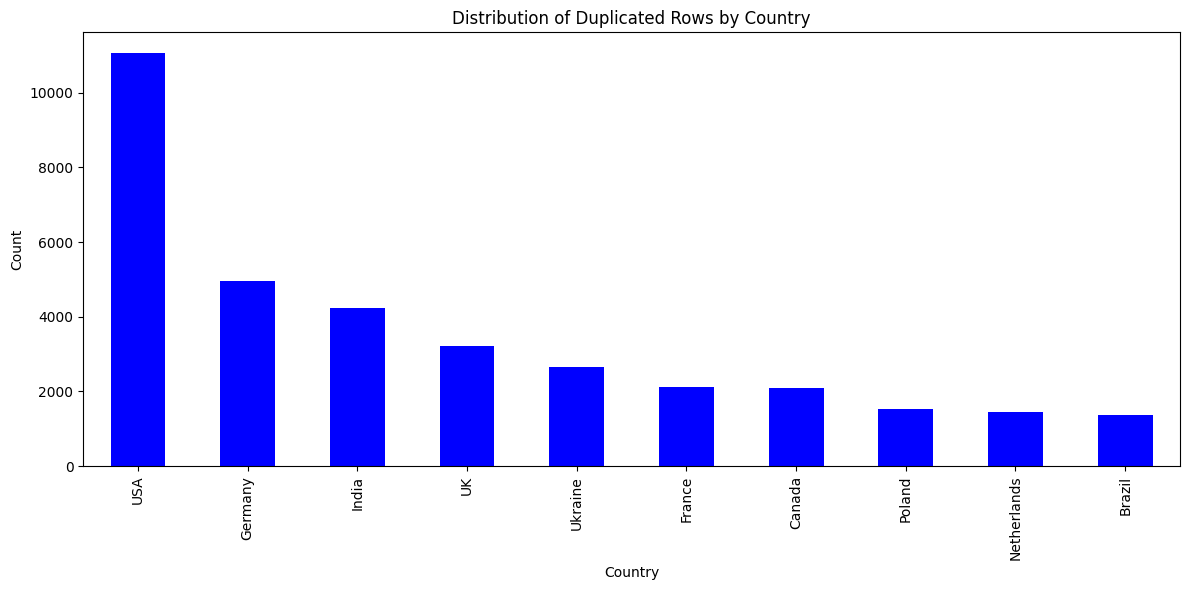

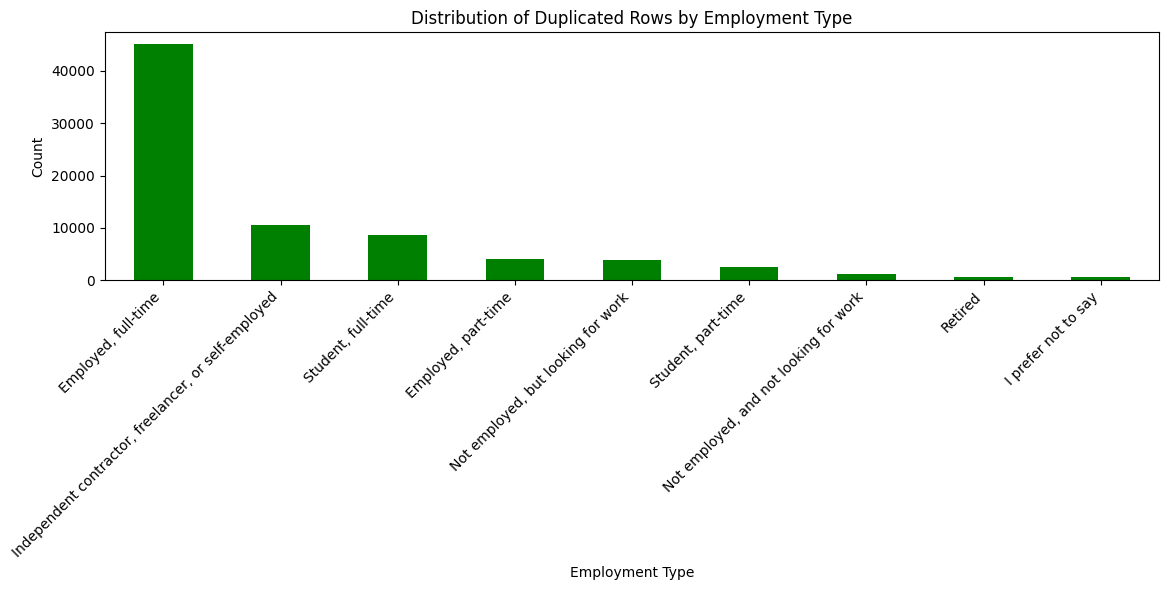

In [8]:
#Duplicate counts by Country

df_duplicates['Country'] = df_duplicates['Country'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
df_duplicates['Country'] = df_duplicates['Country'].str.replace('United States of America', 'USA')

duplicate_counts_country = df_duplicates['Country'].value_counts()

# Plot Country duplicates
plt.figure(figsize=(12, 6))
duplicate_counts_country.head(10).plot(kind='bar', color='blue')
plt.title('Distribution of Duplicated Rows by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Duplicate counts by Employment

# Split multi-values in Employment column and explode into separate rows
df_exploded = df_duplicates.assign(Employment=df_duplicates['Employment'].str.split(';')).explode('Employment')
df_exploded['Employment'] = df_exploded['Employment'].str.strip()  # Remove extra spaces

# Count duplicates per Employment type
duplicate_counts_employment = df_exploded['Employment'].value_counts()

# Plot Employment duplicates
plt.figure(figsize=(12, 6))
duplicate_counts_employment.plot(kind='bar', color='green')
plt.title('Distribution of Duplicated Rows by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [25]:
# Group duplicate rows by the initial subset
grouped_duplicates = df_duplicates.groupby(['MainBranch', 'Employment', 'RemoteWork'])

#checks whether all values in that Series are identical
def all_values_identical(series):
    return series.nunique() == 1
    
# Apply the identical-value check to every column
identical_in_groups = grouped_duplicates.agg(all_values_identical)

# Calculate the percentage of groups where each column had identical values
identical_summary = identical_in_groups.mean().sort_values(ascending=False)

# Show the top 10 columns that are most often identical across duplicates
identical_summary[identical_summary < 0.1].sort_values(ascending=True)
display(identical_summary[identical_summary < 0.1].sort_values(ascending=True))
# Deciding critical columns for defining uniqueness
critical_columns=identical_summary[(identical_summary < 0.05) & (identical_summary > 0)].sort_values(ascending=True).head(10)
critical_cols=critical_columns.index.tolist()
display(critical_cols)
# Remove duplicates based on MainBranch, Employment, RemoteWork + critical columns
deduped_df = df.drop_duplicates(subset=['MainBranch', 'Employment', 'RemoteWork'] + critical_cols)
deduped_df

ResponseId                       0.000000
CodingActivities                 0.003135
BuyNewTool                       0.021944
YearsCodePro                     0.025078
TechEndorse                      0.025078
Currency                         0.031348
LearnCode                        0.037618
YearsCode                        0.040752
LanguageHaveWorkedWith           0.043887
DevType                          0.056426
Country                          0.059561
OrgSize                          0.062696
SOHow                            0.062696
NEWCollabToolsHaveWorkedWith     0.068966
LanguageWantToWorkWith           0.068966
OpSysPersonal use                0.068966
EdLevel                          0.072100
OfficeStackSyncHaveWorkedWith    0.078370
PurchaseInfluence                0.087774
ToolsTechHaveWorkedWith          0.094044
Age                              0.094044
BuildvsBuy                       0.097179
SOComm                           0.097179
LanguageAdmired                  0

['CodingActivities',
 'BuyNewTool',
 'YearsCodePro',
 'TechEndorse',
 'Currency',
 'LearnCode',
 'YearsCode',
 'LanguageHaveWorkedWith']

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65431,65432,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [26]:
# Deciding critical columns for defining uniqueness
#subset = ['Age', 'Employment', 'EdLevel', 'ConvertedCompYearly']
subset =['MainBranch', 'Employment', 'RemoteWork', 'Age', 'EdLevel', 'ConvertedCompYearly' ]


# Remove duplicates based on subset
deduped_df = df.drop_duplicates(subset=subset)
deduped_df


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65283,65284,I am learning to code,18-24 years old,"Employed, full-time;Student, part-time",Remote,Apples,School or academic work,"Secondary school (e.g. American high school, G...",Books / Physical media;Other online resources ...,Books;Stack Overflow;Social Media;How-to video...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65376,65377,"I am not primarily a developer, but I write co...",55-64 years old,"Employed, full-time",Remote,Apples,Hobby,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65425,65426,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Employe...","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65427,65428,"I am not primarily a developer, but I write co...",25-34 years old,"Not employed, but looking for work;Employed, p...",In-person,Apples,Hobby;Professional development or self-paced l...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
